### 1.0- Importando Bibliotecas

In [2]:
# importando Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

### 2.0 - Importando base de dados 

In [5]:
# importando CSV e transformando em Dataframe
data_or= pd.read_csv('DadosSUS_2020_2022.csv', encoding='ISO-8859–1')

# explorando o Dataset
data_or.head()

,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,...,NIV_HIER,TERCEIRO,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR
0,9331603,520010,NaN,NaN,NaN,NaN,M,3,0,3,...,NaN,NaN,2,33,9,0,9,0,202001,1244
1,2335506,520013,15,NaN,NaN,NaN,M,3,269860000125,1,...,NaN,NaN,4,43,3,0,3,0,202001,2062
2,2335506,520013,15,NaN,NaN,NaN,M,3,269860000125,1,...,NaN,NaN,1,3,2,0,1,1,202001,2062
3,2335506,520013,15,NaN,NaN,NaN,M,3,269860000125,1,...,NaN,NaN,2,41,2,0,2,0,202001,2062
4,2335506,520013,15,NaN,NaN,NaN,M,3,269860000125,1,...,NaN,NaN,6,34,4,0,3,1,202001,2062


### 3.0- Pré-processamento 

#### 3.1 - Verificando Linhas Duplicadas 

In [18]:
len(data_or) # Checando o número de linhas antes de remover duplicidades

103498

In [19]:
data_or.duplicated() # Checando se existem duplicidades
data_or = data_or.drop_duplicates() # Removendo duplicidades
len(data_or)# Checando número de linhas da nova versão

103498

#### Observamos que não há duplicidade de linhas, o que indica que os dados já haviam sido limpos previamente.

#### 3.2 - Verificando Outliers na coluna 'QT_EXIST', que será a coluna de estudos inicial

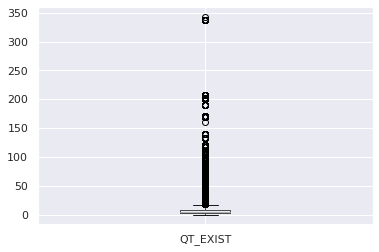

In [22]:
data_or[['QT_EXIST']].boxplot();

#### Observamos que não há Outliers, o que indica que os dados já haviam sido limpos previamente.

In [24]:
#ordenando pela Feature de interesse
data_or.sort_values(by='COMPETEN')

#agrupando por "Competen"
data_group= data_or.groupby(by=['COMPETEN']).sum().sort_values(by='COMPETEN', ascending=True)

data_group= data_group.reset_index()

# Descartando as colunas desnecessárias para a análise
data_min= data_group.drop([ 'DISTRSAN','PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A', 'ATIVIDAD', 'RETENCAO', 'NATUREZA', 'CLIENTEL', 'TP_UNID', 'TURNO_AT', 'NIV_HIER',
'TERCEIRO', 'CODUFMUN','QT_CONTR','NAT_JUR'], axis=1, inplace=False)

#reorganizando as colunas
data_min = data_min[['COMPETEN','QT_EXIST', 'QT_SUS', 'QT_NSUS' ]]

#trocar nome de colunas 
data_min.rename(columns = {'COMPETEN':'MES_ANO', 'QT_EXIST':'LEITOS','QT_SUS':'SUS', 'QT_NSUS': 'N_SUS' }, inplace = True)

#Criando novas colunas. Descobrindo o % de Leitos SUS e leitos não SUS.

data_min['% SUS'] = data_min['SUS'] / data_min['LEITOS'] * 100
data_min['% N_SUS'] = data_min['N_SUS'] / data_min['LEITOS'] * 100

data_min

,MES_ANO,LEITOS,SUS,N_SUS,% SUS,% N_SUS
0,202001,19351,11535,7816,59.609323,40.390677
1,202002,19311,11521,7790,59.660297,40.339703
2,202003,19761,11784,7977,59.632610,40.367390
3,202004,19971,11994,7977,60.057083,39.942917
4,202005,20028,12137,7891,60.600160,39.399840
5,202006,20290,12291,7999,60.576639,39.423361
6,202007,20630,12440,8190,60.300533,39.699467
7,202008,20868,12598,8270,60.369944,39.630056
8,202009,20962,12750,8212,60.824349,39.175651
9,202010,20989,12747,8242,60.731812,39.268188


In [4]:
data_min['MES_ANO'] = pd.to_numeric(data_min['MES_ANO'])
data_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MES_ANO  35 non-null     int64  
 1   LEITOS   35 non-null     int64  
 2   SUS      35 non-null     int64  
 3   N_SUS    35 non-null     int64  
 4   % SUS    35 non-null     float64
 5   % N_SUS  35 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 1.8 KB


**Principais observações**
- Entre o início e o final do período estudado o número de leitos  disponbilizados pelo SUS foi **5x maior que na rede privada.** Enquanto o SUS teve um aumento de mais de 1.500 leitos no período estudado, a rede privada teve aumento de pouco mais de 300 leitos.
- O SUS do Estado de Goiás atende cerca de **5.000 pessoas a mais por mês que a rede privada** em 12/2022.
- No auge da pandemia o SUS de Goiás chegou a atender cerca de 14.000 pessoas(10/2021). Hoje, ao final de 2022 o número de atendimentos é de cerca de 13.100 (12/2022) correspondente a **13,5% de crescimento no período**. 
- No início do período estudado a fatia do SUS era de 59.6% ao finai de 2022 essa fatia era de 61,7%, ou seja, o SUS subiu sua participação em cerca de 2% nesse período.


### 4.0-  Plotando Gráficos

([], [])

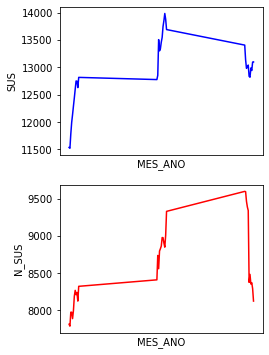

In [10]:
#Vamos plotar os dois gráficos separadamente

#definindo o tamanho das figuras

fig = plt.figure(figsize=(8, 6))

# Gráfico 1 - Plotando Gráfico SUS
fig.add_subplot(221)
sns.lineplot(data=data_min, x='MES_ANO', y='SUS', color='blue')
plt.xticks([])

# Gráfico 2 - Plotando Gráfico NÃO-SUS
fig.add_subplot(223)
sns.lineplot(data=data_min, x='MES_ANO', y='N_SUS', color='red')
plt.xticks([])

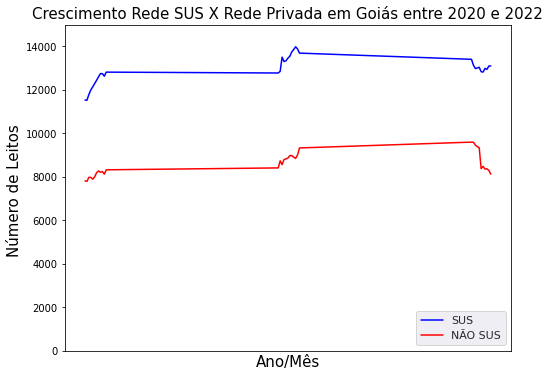

In [11]:
#Agora vamos plotar os dois gráficos juntos para facilitar nossa comparação 

plt.subplots(figsize=(8, 6))

#Adicionando título
plt.title('Crescimento Rede SUS X Rede Privada em Goiás entre 2020 e 2022',  fontsize=15)

#Configurando Labels
plt.xlabel('Ano/Mês', fontsize=15)
plt.ylabel('Número de Leitos ', fontsize=15)
plt.ylim(0, 15000)


# Mudando a grossura dos eixos.
plt.tick_params(axis='both', labelsize=10)

#Configurando Ticks
plt.xticks(rotation=45)
plt.xticks([])

#escolhendo tema
sns.set_theme(style="darkgrid")

#plotando
sns.lineplot(data=data_min, x='MES_ANO', y='SUS', color='blue', label="SUS")
sns.lineplot(data=data_min, x='MES_ANO', y='N_SUS', color='red', label="NÃO SUS")
plt.legend(loc="lower right")

**Principais observações**
O gráfico nos mostra que a pandemia trouxe um **aumento significativo para o SUS**, que vem se mantendo após a estabilização da pandemia.
Um comparativo visual nos mostra que o número de leitos da Rede Privada está voltando aos patamares pré pandemia (na casa dos 8.000 leitos) enquanto o SUS subiu de patamar no período pandêmico, saindo da casa dos 11.500 leitos para mais de 13.000 ao final do período estudado, ou seja, o **SUS segue numa tendência de alta ao final da pandemia.**

### 5.0- Analisando Descentralização de Leitos

#### 5.1- Análise por municípios 

In [13]:
# Nessa segunda parte do nosso estudo vamos avaliar a Centralização dos leitos no período entre 2020 e 2022

#Criando uma copia do data_group
data_or_2= data_or 

# Descartando as colunas desnecessárias para a análise
data_min_2= data_or_2.drop([ 'REGSAUDE', 'MICR_REG', 'DISTRADM', 'TPGESTAO', 'CNES', 'TP_LEITO', 'CODLEITO', 'DISTRSAN','PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A', 'ATIVIDAD', 'RETENCAO', 'NATUREZA', 'CLIENTEL', 'TP_UNID', 'TURNO_AT', 'NIV_HIER',
'TERCEIRO', 'QT_CONTR','NAT_JUR'], axis=1, inplace=False)

#reorganizando as colunas
data_min_mun = data_min_2[['COMPETEN','QT_EXIST', 'QT_SUS', 'QT_NSUS', 'CODUFMUN']]

#trocar nome de colunas 
data_min_2.rename(columns = {'COMPETEN':'MES_ANO', 'QT_EXIST':'LEITOS',
                              'QT_SUS':'SUS', 'QT_NSUS': 'N_SUS', 'CODUFMUN':"MUN" }, inplace = True)
#verificando a nova versão do Data Set 
data_min_2


,MUN,LEITOS,SUS,N_SUS,MES_ANO
0,520010,9,9,0,202001
1,520013,3,3,0,202001
2,520013,2,1,1,202001
3,520013,2,2,0,202001
4,520013,4,3,1,202001
...,...,...,...,...,...
103493,522205,3,3,0,202211
103494,522205,3,3,0,202211
103495,522220,7,7,0,202211
103496,522220,2,2,0,202211


In [15]:
#Calculando a quantidade de municípios com leitos em Janeiro de 2020

data_min_2_mask= data_min_2['MES_ANO']==202001
filtered_df = data_min_2[data_min_2_mask]
dff= filtered_df['MUN'].unique()

#Calculando a quantidade de municípios com leitos em Janeiro de 2021
data_min_2_mask_2= data_min_2['MES_ANO']==202101
filtered_df_2 = data_min_2[data_min_2_mask_2]
dff_2= filtered_df_2['MUN'].unique()

#Calculando a quantidade de municípios com leitos em Janeiro de 2022
data_min_2_mask_3= data_min_2['MES_ANO']==202201
filtered_df_3 = data_min_2[data_min_2_mask_3]
dff_3= filtered_df_3['MUN'].unique()

#Calculando a quantidade de municípios com leitos em Novembro de 2022
data_min_2_mask_4= data_min_2['MES_ANO']==202211
filtered_df_4 = data_min_2[data_min_2_mask_4]
dff_4= filtered_df_4['MUN'].unique()

##Imprimindo os resultados acima
print(len(dff), len(dff_2), len(dff_3), len(dff_4))

188 187 193 193


#### 5.1- Análise por número de Estabelecimentos 

In [16]:
# Seguimos analisando a Descentralização de leitos, agora olhando a quantidade de estabelecimentos

#Criando uma copia do data_or
data_or_3= data_or 

# Descartando as colunas desnecessárias para a análise
data_min_3= data_or_3.drop([ 'REGSAUDE', 'MICR_REG', 'DISTRADM', 'TPGESTAO', 'CODUFMUN', 'TP_LEITO', 'CODLEITO', 'DISTRSAN','PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A', 'ATIVIDAD', 'RETENCAO', 'NATUREZA', 'CLIENTEL', 'TP_UNID', 'TURNO_AT', 'NIV_HIER',
'TERCEIRO', 'QT_CONTR','NAT_JUR'], axis=1, inplace=False)

#reorganizando as colunas
data_min_hosp = data_min_3[['COMPETEN','QT_EXIST', 'QT_SUS', 'QT_NSUS', 'CNES']]

#trocar nome de colunas 
data_min_3.rename(columns = {'COMPETEN':'MES_ANO', 'QT_EXIST':'LEITOS',
                              'QT_SUS':'SUS', 'QT_NSUS': 'N_SUS', 'CNES':"ESTAB." }, inplace = True)
#verificando a nova versão do Data Set 
data_min_3

,ESTAB.,LEITOS,SUS,N_SUS,MES_ANO
0,9331603,9,9,0,202001
1,2335506,3,3,0,202001
2,2335506,2,1,1,202001
3,2335506,2,2,0,202001
4,2335506,4,3,1,202001
...,...,...,...,...,...
103493,2383691,3,3,0,202211
103494,2383691,3,3,0,202211
103495,2439883,7,7,0,202211
103496,2439883,2,2,0,202211


In [17]:
#Calculando a quantidade de estabelecimentos com leitos em Janeiro de 2020

data_min_3_mask= data_min_3['MES_ANO']==202001
filtered_df_5 = data_min_3[data_min_3_mask]
dff_5= filtered_df_5['ESTAB.'].unique()

#Calculando a quantidade de estabelecimentos com leitos em Janeiro de 2021
data_min_3_mask_2= data_min_3['MES_ANO']==202101
filtered_df_6 = data_min_3[data_min_3_mask_2]
dff_6= filtered_df_6['ESTAB.'].unique()

#Calculando a quantidade de estabelecimentos com leitos em Novembro de 2022

data_min_3_mask_4= data_min_3['MES_ANO']==202211
filtered_df_7 = data_min_3[data_min_3_mask_4]
dff_7= filtered_df_7['ESTAB.'].unique()

##Imprimindo os resultados acima
print(len(dff_5), len(dff_6), len(dff_7))

472 489 507


""" Podemos afirmar que também **houve uma descentralização dos leitos no estado.** 
-Observa-se também que o número de Estabelecimentos com leitos subiu de 472 para 507, correspondente a 7,5% de aumento.

-Observa-se também que o número de Municípios com leitos subiu de 188 para 193, correspondente a cerca de 1% de aumento.

-Observamos ainda que o aumento no número de cidades atendidas é um grande fator de descentralização.Isso porque quando novas cidades são escolhidas de forma estratégica, elas podem facilitar o **acesso aos leitos de dezenas de cidades** ao seu redor."""